# Task 3: Exploratory Data Analysis on Dataset - Terrorism 

Author: Jahnavi Gundakaram

# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [3]:
data=pd.read_csv("globalterrorismdb_0718dist.csv")

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [199]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# Renaming Certain Columns

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'day',
                     'gname':'Group','country_txt':'Country','region_txt':'Region',
                     'provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude',
                     'summary':'Summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype',
                     'weaptype1_txt':'Weapon','nkill':'Kill','nwound':'Wound'},inplace=True)

In [7]:
data=data[['Year','Month','day','Country','State','Region','City','Latitude','Longitude','Attacktype','Kill','Wound',
          'targtype1','Summary','Group','Targettype','Weapon','motive']]

# Feature Extraction

In [15]:
col = data.columns.tolist()
print(col)

['Year', 'Month', 'day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Attacktype', 'Kill', 'Wound', 'targtype1', 'Summary', 'Group', 'Targettype', 'Weapon', 'motive', 'Casualities']


In [8]:
data.head()

,Year,Month,day,Country,State,Region,City,Latitude,Longitude,Attacktype,Kill,Wound,targtype1,Summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,14,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,7,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,10,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,7,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,7,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
data.shape

(181691, 18)

# Checking for null values

In [10]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attacktype         0
Kill           10313
Wound          16311
targtype1          0
Summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [12]:
data['Wound']=data['Wound'].fillna(0)
data['Kill']=data['Kill'].fillna(0)

In [13]:
data['Casualities']=data['Kill']+data['Wound']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  Kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  targtype1    181691 non-null  int64  
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [211]:
data.describe()

,Year,Month,day,Latitude,Longitude,Kill,Wound,targtype1,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,8.439719,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,6.653838,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,1.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,3.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,4.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,14.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,22.000000,9574.000000


# Data Analysis and Data Visualisation

# Correlation Heatmap

In [16]:
corr = data.corr()

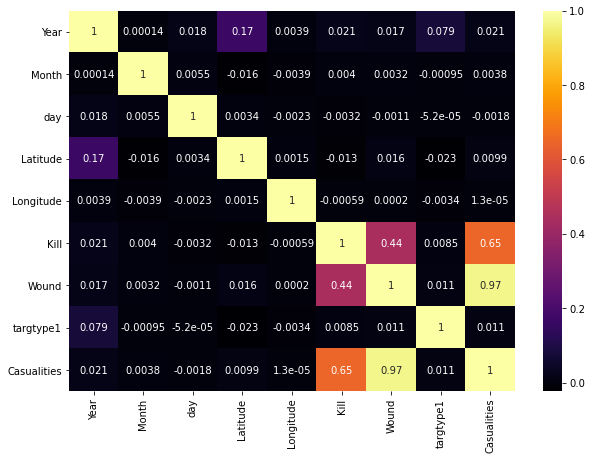

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True, cmap='inferno')
plt.show()

# Attacks in years

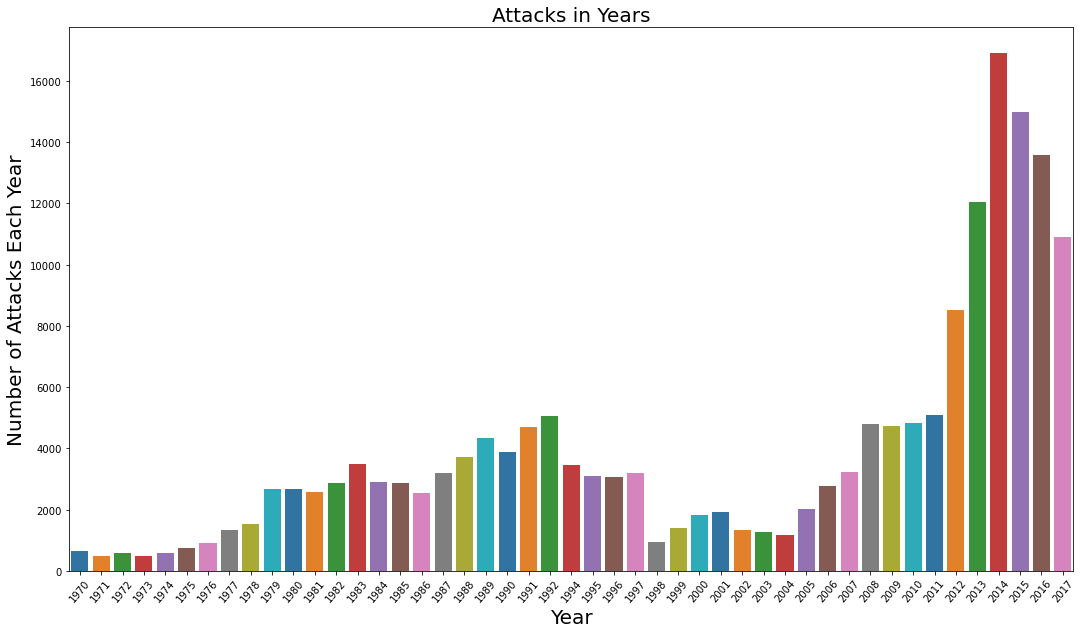

In [43]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x=year,y=years_count,palette='tab10')
plt.xticks(rotation=50)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks in Years',fontsize=20)
plt.show()

# Terrorist activities by region in each year

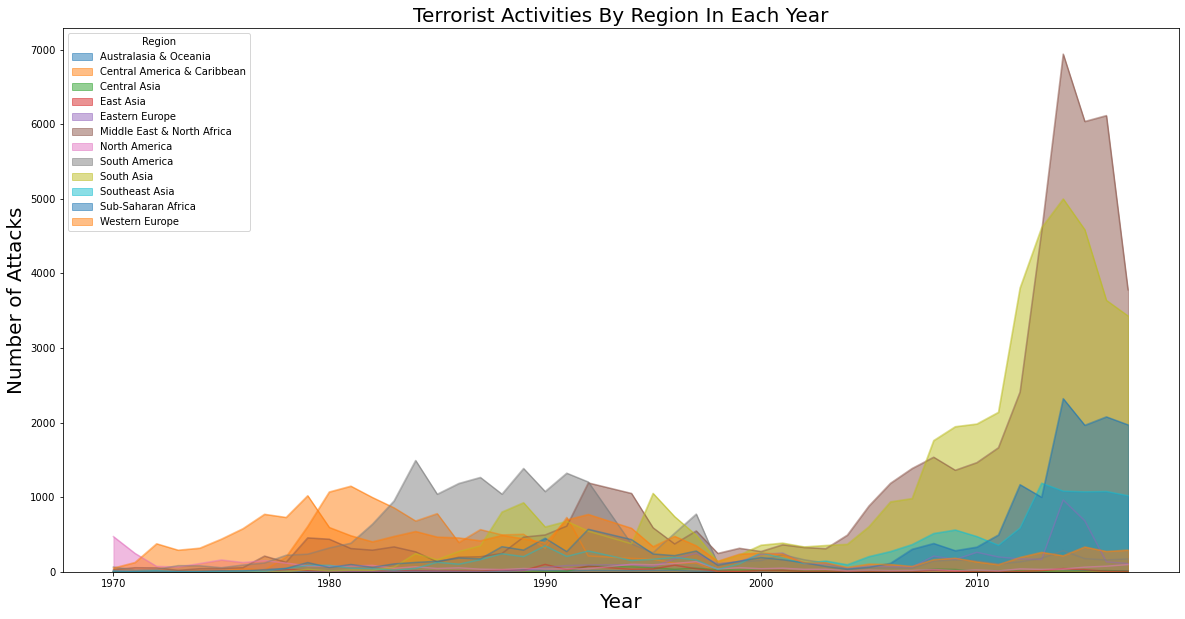

In [213]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year', fontsize=20)
plt.ylabel('Number of Attacks', fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.show()

In [214]:
attack = data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [215]:
data.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

# Top countries affected

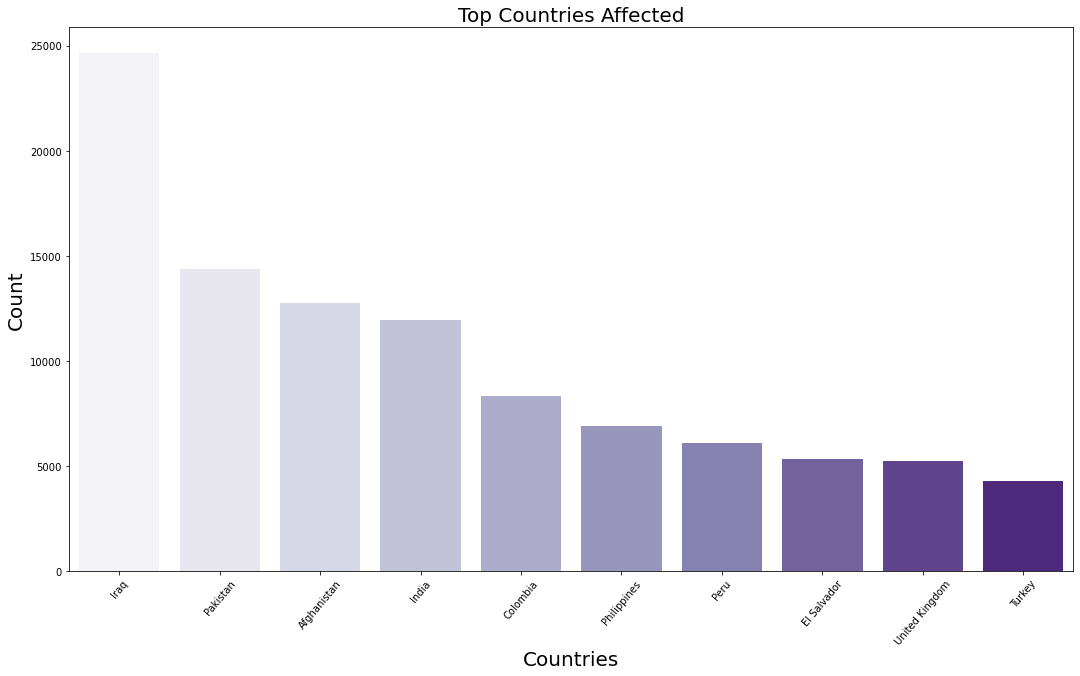

In [47]:
plt.subplots(figsize=(18,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='Purples')
plt.title('Top Countries Affected', fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=50)
plt.show()

# People died due to attack

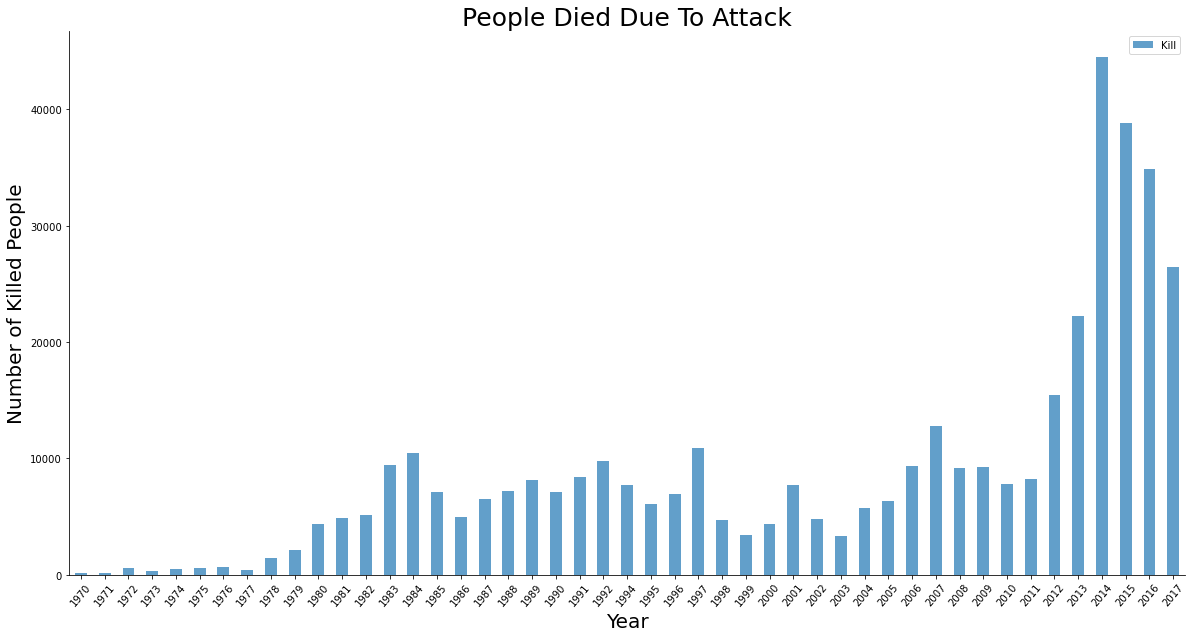

In [217]:
data=data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4=plt.subplots(figsize=(20,10))
data.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation=50)
plt.title('People Died Due To Attack',fontsize=25)
plt.ylabel('Number of Killed People',fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side=ax4.spines['top']
top_side.set_visible(False)
right_side=ax4.spines['right']
right_side.set_visible(False)

# Top 30 most affected states by terrorist attacks

In [23]:
states_aff = data['State'].value_counts()
print('Number of states affected by terrorist attacks:',len(states_aff))

Number of states affected by terrorist attacks: 2854


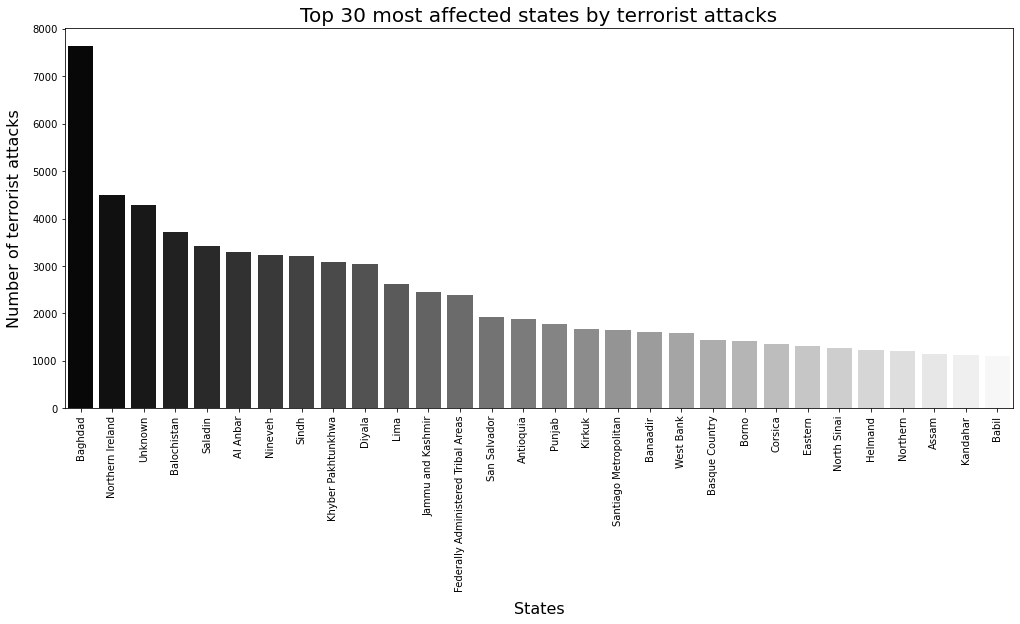

In [51]:
fig=plt.figure(figsize=(17,7))
sns.barplot(states_aff[0:30].index, states_aff[0:30].values,palette='gist_gray')
plt.title('Top 30 most affected states by terrorist attacks',fontsize=20)
plt.xlabel('States',fontsize=16,labelpad=10)
plt.ylabel('Number of terrorist attacks',fontsize=16,labelpad=10)
plt.xticks(rotation=90)
plt.show()

# Most affected regions by terrorist attcaks

In [29]:
regions_aff = data['Region'].value_counts()
print('Number of regions affected by the terrorist attacks:',len(regions_aff))

Number of regions affected by the terrorist attacks: 12


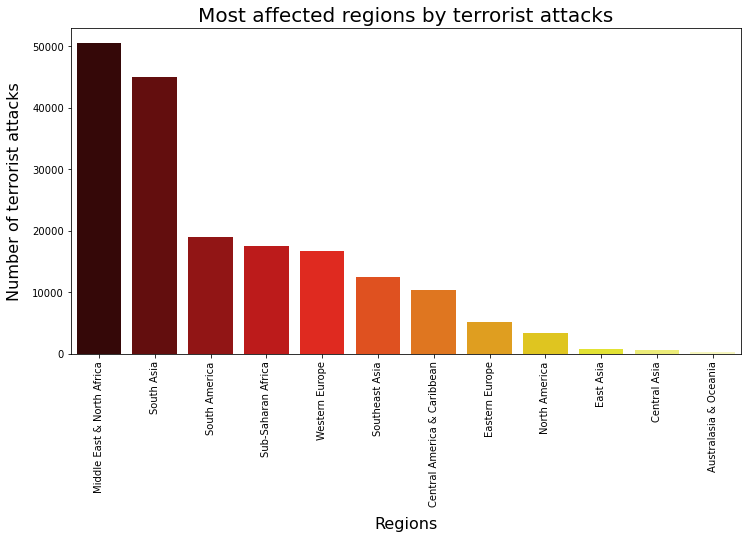

In [52]:
fig=plt.figure(figsize=(12,6))
sns.barplot(regions_aff.index, regions_aff.values,tick_label = regions_aff.index, palette='hot')
plt.title('Most affected regions by terrorist attacks',fontsize=20)
plt.xlabel('Regions',fontsize=16,labelpad=10)
plt.ylabel('Number of terrorist attacks',fontsize=16,labelpad=10)
plt.xticks(rotation=90)
plt.show()

# Most affected states by terrorist attacks

In [34]:
terror_grps = data['Group'].value_counts()
print('Number of terrorist groups attacked:', len(terror_grps))

Number of terrorist groups attacked: 3537


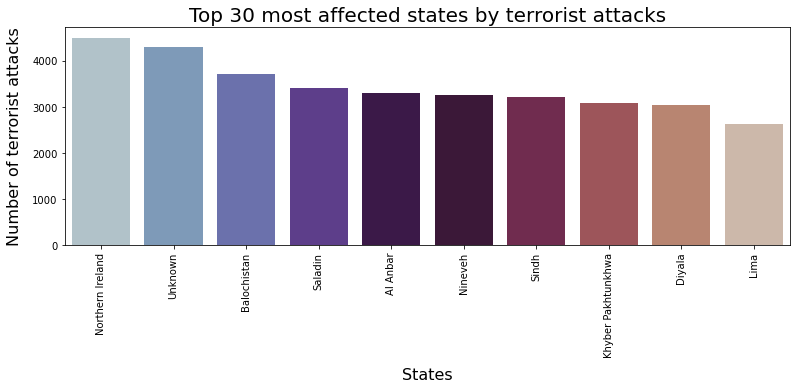

In [53]:
fig=plt.figure(figsize=(13,4))
sns.barplot(states_aff[1:11].index, states_aff[1:11].values,palette='twilight')
plt.title('Top 30 most affected states by terrorist attacks',fontsize=20)
plt.xlabel('States',fontsize=16,labelpad=10)
plt.ylabel('Number of terrorist attacks',fontsize=16,labelpad=10)
plt.xticks(rotation=90)
plt.show()

# Most of the attack types

In [40]:
attack_types = data['Attacktype'].value_counts()
print('Number of types of attacks executed by terrorists:', len(attack_types))

Number of types of attacks executed by terrorists: 9


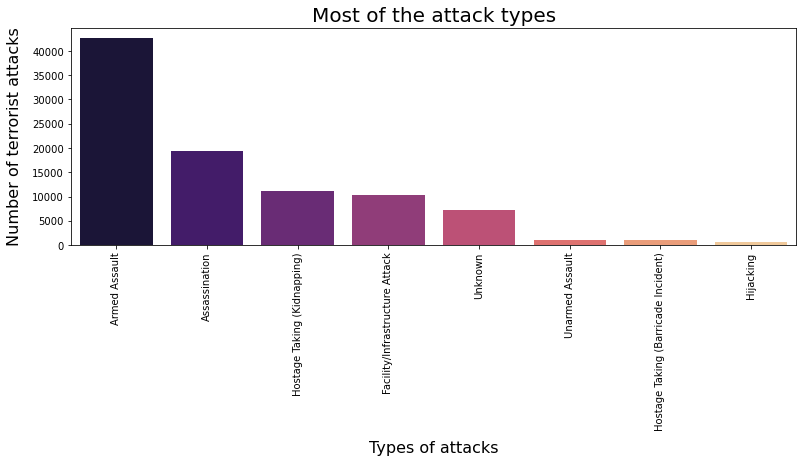

In [59]:
fig=plt.figure(figsize=(13,4))
sns.barplot(attack_types[1:11].index, attack_types[1:11].values,palette='magma')
plt.title('Most of the attack types',fontsize=20)
plt.xlabel('Types of attacks',fontsize=16,labelpad=10)
plt.ylabel('Number of terrorist attacks',fontsize=16,labelpad=10)
plt.xticks(rotation=90)
plt.show()